In [2]:
from IPython.display import Latex
%matplotlib inline
"""  SciPy在NumPy的基础上增加了众多的数学、科学以及工程计
算中常用的模块，例如线性代数、常微分方程数值求解、信号处理
、图像处理、稀疏矩阵，等等"""
"常数和特殊函数"
" SciPy的 constants模块 包含了众多的物理常数"
from scipy import constants as C
C.c # 真空光速

299792458.0

In [2]:
C.h # 普朗克常量

6.62607004e-34

In [3]:
"""在字典physical_constants中，以物理常量名为键，对应的值是一
个含有三个元素的元组， 分别为常数值、单位及误差，例如下面
的程序可以查看电子质量"""
C.physical_constants["electron mass"]

(9.10938356e-31, 'kg', 1.1e-38)

In [4]:
"除了物理常数之外，constants 模块中还包括许多单位信息"
C.mile # 1英里等于多少米

1609.3439999999998

In [5]:
C.inch     # 1英寸等于多少米 

0.0254

In [6]:
C.gram   # 1克等于多少千克 

0.001

In [7]:
C.pound   # 1磅等于多少千克

0.45359236999999997

In [13]:
""" SciPy的 special 模块是一个非常完整的函数库，其中包含了基本数学
函数、特殊数学函数以及NumPy中出现的所有函数。由于函数数量众多
，本节仅对其进行简要介绍。至于具体包含的函数列表，请参考SciPy
的帮助文档。"""
""" 伽玛函数是概率统计学中经常出现的一个特殊函数，它的计算公式
如下："""
from IPython.display import Latex
Latex(r"\[ \Gamma(z) = \int_0^\infty t^{z-1}e^{-1} dt\]")

<IPython.core.display.Latex object>

In [14]:
"""，通过此公式计算伽马函数的值是比较麻烦的，可以用 special 模
块中的gamma()进行计算"""
import scipy.special as S
S.gamma(4)

6.0

In [15]:
S.gamma(0.5)

1.7724538509055159

In [16]:
S.gamma(1+1j)  # gamma 函数支持复数

(0.4980156681183547-0.1549498283018101j)

In [17]:
S.gamma(1000)

inf

In [18]:
"""伽马函数是阶乘函数在实数和复数范围上的扩展，它的增长速度非常快
，因为1000的阶乘 已经超过了双精度浮点数的表示范围，因此结果是
无穷大。为了计算更大的范围，可以使用 S.gammaln()"""
S.gammaln(1000)

5905.220423209181

In [19]:
"""它使用特殊的算法，直接计算伽马函数的
对数值，因此可以表示更大的范围。"""
""" special模块中的某些函数并不是数学意义上的特殊函数，例如
log1p(x)计算log(1+x)的值。 这是由于浮点数的精度有限，无法很精确地
表示十分接近1的实数"""
""" 例如无法用浮点数表示”1 + 1e-20”的值，因此“log(1+1e-20)”的值为0,
而当使用log1p()时，则可以很精确地计算"""
1 + 1e-20

1.0

In [21]:
import math
math.log(1+1e-20)

0.0

In [22]:
S.log1p(1e-20) # 实际上当x非常小时，log1p(x)约等于x

1e-20

In [23]:
"优化—optimize"
"最小二乘拟合"
""" 假设有一组实验数据(xi，yi ), 事先知道它们之间应该满足某函
数关系yi=f(xi)，通过这些已知信息，需要确定函数f的一些参数"""
""" 例如，如果函数f是线性函数 f(x)=kx+b ,那么参数 k和b就是需
要确定的值"""
"""如果用p表示函数中需要确定的参数，那么目标就是找到一组p,使得
下面的函数S的值最小"""
Latex(r"\[ S(p) = \sum_{i=1}^{M}[y_i - f(x_i,p)]^2 \]")
"这种算法被称为最小二乘拟合(Least-square fitting)。"

<IPython.core.display.Latex object>

In [26]:
"""在optimize模块中，可以使用leastsq()对数据进行最小二乘拟合计算。
leastsq() 的用法很简单，只需要将计算误差的函数和待确定参数的初始值
传递给它即可。下面是用leastsq()对线性函数进行拟合的程序"""
"用最小二乘法拟合直线，并显示误差曲面"
import numpy as np
from scipy.optimize import leastsq

X = np.array([ 8.19, 2.72, 6.39, 8.71, 4.7, 2.66, 3.78])
Y = np.array([ 7.01, 2.78, 6.47, 6.71, 4.1, 4.23, 4.05])

# 定义产差函数，p为拟合需要找到的系数
def residuals(p): 
    "计算以p为参数的直线和原始数据之间的误差"
    k,b = p
    return Y - (k*X + b)

# leastsq使得residuals()的输出数组的平方和最小，参数的初始值为[1,0]
r = leastsq(residuals, [1, 0]) 
k, b = r[0]
print("k =",k, "b =",b)

k = 0.6134953491930442 b = 1.794092543259387


真实参数: [10, 0.34, 0.5235987755982988]
拟合参数 [-9.53673555  0.33493052 -2.77338117]


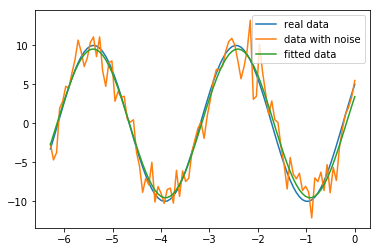

In [4]:
""" leastsq()函数传入误差计算函数和初始值[1,0]，该初始值将作为误差
计算函数的第一个参数传入；计算的结果r是一个包含两个元素的元组
，第一个元素是一个数组，表示拟合后的参数k、b；第二个元素如果等
于1、2、3、4中的其中一个整数，则拟合成功，否则将会返回mesg .  程
序的输出为k = 0.6134953491930442 b = 1.794092543259387"""
""" residuals()的参数p是拟合直线的参数，函数返回的是原始数据
和拟合直线之间的误差。"""
"再看一个对正弦波数据进行拟合的例子"
"使用最小二乘法对带噪声的正玄波数据进行拟合"
"""
使用leastsq()对带噪声的正弦波数据进行拟合。拟合所得到的参数虽然和
实际的参数有可能完全不同，但是由于正弦函数具有周期性，实际上拟合
的结果和实际的函数是一致的。
"""
import numpy as np
from scipy.optimize import leastsq

# 定义拟合函数的值
def func(x, p): 
    """数据拟合所用的函数: A*sin(2*pi*k*x + theta)"""
    A, k, theta = p
    return A*np.sin(2*np.pi*k*x+theta)

# 定义产差函数
def residuals(p, y, x): 
    """实验数据x, y和拟合函数之间的差，p为拟合需要找到的系数"""
    return y - func(x, p)

x = np.linspace(-2*np.pi, 0, 100)
A, k, theta = 10, 0.34, np.pi/6 # 真实数据的函数参数

y0 = func(x, [A, k, theta]) # 真实数据
y1 = y0 + 2 * np.random.randn(len(x)) # 加入噪声之后的实验数据

p0 = [7, 0.2, 0] # 第一次猜测的函数拟合参数

# 调用leastsq进行数据拟合, residuals为计算误差的函数
# p0为拟合参数的初始值,
# args为需要拟合的实验数据
plsq = leastsq(residuals, p0, args=(y1, x)) 
""" 除了初始值之外，还调用了args参数，用于指定residuals中使用到的
其他参数（直线拟合时直接使用了X,Y的全局变量）,同样也返回一个元组，
第一个元素为拟合后的参数数组；
"""
print(u"真实参数:", [A, k, theta]) 
print(u"拟合参数", plsq[0]) # 实验数据拟合后的参数

import pylab as pl
pl.plot(x, y0, label=u"real data")
pl.plot(x, y1, label=u"data with noise")
pl.plot(x, func(x, plsq[0]), label=u"fitted data")
pl.legend()
pl.show()

In [30]:
""" 程序中，要拟合的func()是一个正弦函数，它的参数p是一个数组，包
含决定正弦波的三个参数：A、k、theta,分别对应正弦函数的振幅、频
率和相角。一组包含噪声的数据:(x,y1),其中数组y1在标准正弦波数据y0
之上添加了随机噪声。"""
"""用leastsq()对带噪声的实验数据(x,y1)进行数据拟合，它可以找到数组
x和真实数据y0之间的正弦关系，即确定A、k、theta等参数。这里将 
(y1, x)传递给args参数。Leastsq()会将这两个额外的参数传递给
residuals()。因此residuals()有三个参数，p是正弦函数的参数，y和x是表
示实验数据的数组。"""
"""看到拟合参数虽然和真实参数完全不同，但是由于正弦函数具有周期
性，实际上拟合参数得到的函数和真实参数对应的函数是一致的"""
print()

In [31]:
"函数最小值"
""" optimize模块还提供了许多求函数最小值的算法：fmin、
fmin_powell、 fmin_cg、fmin_bfgs 等。下面用一个实例观察这些
“fmin*()”是如何找到函数的最小值的。在本例中，要计算最小值的
函数f(x,y)为"""
Latex(r"\[ f(x,y) = (1-x)^2 + 100(y-x^2)^2 \]")

<IPython.core.display.Latex object>

In [32]:
""" 为了提高运算速度和精度，有些“fmin()” 带有一个fprime参数，
它是计算目标函数f对各个自变量的偏导数的函数"""
""" f(x,y)对变量x和y的偏导函数为"""
Latex(r"""\[ \frac{\partial f}{\partial x} 
      = -2+2x-400x(y-x^2), \frac{\partial f}{\partial y}
      = 200y - 200x^2\]""")

<IPython.core.display.Latex object>

In [35]:
""" 这个函数叫做Rosenbrock(罗森布罗克)函数，它经常用来测试最小
化算法的收敛速度。它有一个十分平坦的山谷区域，收敛到此山谷区
域比较容易，但是在山谷区域搜索到最小点则比较困难。根据函数的
计算公式不难看出此函数的最小值是0,在(1,1)处。"""
"下面的程序计算f(x,y)的最小值"
"使用fmin()计算函数最小值。"
# 观察fmin函数计算最小值时的路径
import numpy as np
import scipy.optimize as opt
import sys

points = []
def f(p):
    x,y = p
    z = (1-x)**2 + 100*(y-x**2)**2
    points.append((x,y,z))
    return z
# 定义偏导数
def fprime(p):
    x,y = p
    dx = -1 + 2*x -400*x*(y-x**2)
    dy = 200*y - 200*x**2
    return np.array([dx,dy])

init_point = (-2,-2)

try:
    method = sys.argc[1]
except:
    method = "fmin_bfgs"

fmin_func = opt.__dict__[method]
if method in ["fmin", "fmin_powell"]:
    result = fmin_func(f, init_point) # 参数为目标函数和初值
elif method in ["fmin_cg", "fmin_bfgs", "fmin_l_bfgs_b", "fmin_tnc"]:
    result = fmin_func(f, init_point, fprime)
elif method in ["fmin_cobyla"]:
    result = fmin_func(f, init_point, [])
else:
    print("fmin function not found.")
    sys.exit(0)


         Current function value: 0.332852
         Iterations: 44
         Function evaluations: 159
         Gradient evaluations: 147


In [36]:
"""f()计算f(x,y)的函数值，为了记录下最小化过程中的计算轨迹，在f()
中将每个计算过的 点都添加进全局列表points中。fprime()计算f(x,y)对
两个自变量在p处的偏导函数的值。"""
"""最小化的初值设置为(-2,2)，此程序从optimize模块的__dict_字典中获
得由命令行 参数指定的最小值函数。不同的“fmin*()”参数有所不同，例
如有些算法不需要fprime()"""
"非线性方程组求解"
""" optimize模块中的fsolve()可以对非线性方程组进行求解，它的基本调
用形式如 fsolve(func, x0)"""
""" func是计算方程组误差的函数，它的参数x是一个数组，其值为方程
组的一组可能的解。 func返问将x代入方程组之后得到的毎个方程的误
差，x0为未知数的一组初始值。假设要对下 面的方程组进行求解"""
"""
 f1(u1,u2,u3)=0,
 f2(u1,u2,u3)=0,
 f3(u1,u2,u3)=0
"""
"那么funce可以如下定义"
def func(x):
      u1,u2,u3 = x
      return [f1(u1,u2,u3), f2(u1,u2,u3), f3(u1,u2,u3)]

In [37]:
"使用folve求非线性方程组的解，方程如下"
Latex(r"\[ 5x_1 + 3 = 0, 4x_0^2 -2sin(x_1x_2) = 0, x_1x_2 - 1.5 = 0 \]")

<IPython.core.display.Latex object>

In [38]:
"使用folve求非线性方程组的解"
from scipy.optimize import fsolve
from math import sin

def f(x):
    x0, x1, x2 = x.tolist()
    return [
        5*x1 + 3,
        4*x0*x0 - 2*sin(x1*x2),
        x1*x2 - 1.5
    ]
# f计算方程组的误差，[1,1,1]是未知数的初值
result = fsolve(f, [1,1,1])
print("x0,x1,x2: ", result)
print(u"误差: ", f(result)) # 带入后结果接近于0是说明求解正确

x0,x1,x2:  [-0.70622057 -0.6        -2.5       ]
误差 [0.0, -9.126033262418787e-14, 5.329070518200751e-15]


In [51]:
"""由于fsolve函数在调用函数f时，传递的参数为数组，因此如果直接使
用数组中的元素计算的话，计算速度将会有所降低，因此这里先用
float函数将数组中的元素转换为Python中的标准浮点数，然后调用标
准math库中的函数进行运算"""
"""在对方程组进行求解时，fsolve会自动计算方程组的雅可比矩阵，如
果方程组中的未知数很多，而与每个方程有关的未知数较少时，即雅可
比矩阵比较稀疏时，传递一个计算雅可比矩阵的函数将能大幅度提高运
算速度。在一个模拟计算的程序中需要大量求解近有50个未知数的非线
性方程组的解。每个方程平均与6个未知数相关，通过传递雅可比矩阵
的计算函数使计算速度提高了4倍"""

"雅可比矩阵"
"""雅可比矩阵是一阶偏导数以一定方式排列的矩阵，它给出了可微分
方程与给定点的最优线性逼近，因此类似于多元函数的导数。例如前面
的函数f1,f2,f3和未知数u1,u2,u3的雅可比矩阵如下"""
Latex(r""" \[
\left| \begin{array}{ccc}
\frac{\partial f_1}{\partial u_1}& \frac{\partial f_1}{\partial u_2}& \frac{\partial f_1}{\partial u_3}\\
\frac{\partial f_2}{\partial u_1}& \frac{\partial f_2}{\partial u_2}& \frac{\partial f_3}{\partial u_3}\\\
\frac{\partial f_3}{\partial u_1}& \frac{\partial f_3}{\partial u_2}& \frac{\partial f_3}{\partial u_3}
\end{array} \right|
\]""")

<IPython.core.display.Latex object>

In [52]:
"# 使用雅克比矩阵求解非线性方程组"
# 雅克比矩阵是f分别对x0,x1,...求偏导之后得到的矩阵
# 对于未知数较多时可以显著提高速度
from scipy.optimize import fsolve
from math import sin,cos

def j(x):
    x0, x1, x2 = x.tolist()
    return [
        [0, 5, 0],
        [8*x0, -2*x2*cos(x1*x2), -2*x1*cos(x2*x2)],
        [0, x2, x1]
    ]

result = fsolve(f, [1,1,1], fprime=j)

print("result: ", result)
print(u"误差: ", f(result))

result:  [-0.70622057 -0.6        -2.5       ]
误差:  [0.0, -2.220446049250313e-16, 0.0]


In [5]:
""" 计算雅可比矩阵的函数j()和f()一样，其x参数是未知数的一组值，它
计算非线性方程组在x处的雅可比矩阵。通过fprime参数将j()传递给
fsolve()。由于本例中的未知数很少， 因此计算雅可比矩阵并不能显著
地提高计算速度"""
"插值"
"""插值是一种通过己知的离散数据来求未知数据的方法。与拟合不同的
是，它要求曲线通过所有的已知数据。SciPy的interpolate模块提供了许
多对数据进行插值运算的函数"""
"B样条曲线插值"
""" 一维数据的插值运算可以通过interp1d() 完成。其调用形式如下，它
实际上不是函数而是一 个类interp1d(x, y, kind='linear',...)"""
"""其中：参数kind是插值类型，给出了插值的B样条曲线的阶数，可以
有如下候选值"""
""" 
"zero"/"nearest":阶梯插值，相当于0阶B样条曲线。
"slinear"/"linear":线性插值，用一条直线连接所有的取样点，
相当于1阶B样条曲线，"slinear"使用扩展库中的相关函数进行计算，
而"linear"则直接使用Python编写的函数进行运算，它们的结果一样。
"quadratic"/"cubic"：2阶和3阶B样条曲线，更高阶的曲线可以直接
使用整数值指定。"""
""" interp1d对象可以计算x的取值范围之内任意点的函数值。
它可以像函数一样直接调用，像NumPy的ufunc函数一样能对数组中的
每个元素进行计算，并返回一个新的 数组"""

print()

In [6]:
"# 插值"
"""# 是一种通过已知的离散数据来求未知数据的方法
# 与拟合不同的是它要求曲线通过所有已知数据"""

# B样条曲线插值
"""
# 一维数据的插值运算可以通过interpld()完成，调用形式如下：
# interp1d(x, y, kind='linear',...) #p1d时1234的1
# 其中kind是插值类型，给出了插值的B样条曲线的阶数，可以有以下候选值
# zero    nearest  阶梯插值，相当于0阶B样条曲线
# slinear linear   线性插值，相当于1阶B样条曲线
# quadratic cubic  2阶和3阶B样条曲线，更高阶的曲线可以直接使用整数指定
"""
print()

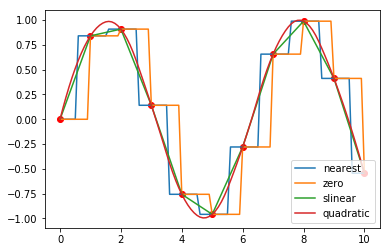

In [54]:
"B样条曲线插值"
import numpy as np
from scipy import interpolate
import pylab as pl

x = np.linspace(0, 10, 11)
y = np.sin(x)

xnew = np.linspace(0, 10, 101)
pl.plot(x, y, 'ro')
for kind in ['nearest', 'zero', 'slinear', 'quadratic']:
    f = interpolate.interp1d(x,y,kind=kind)
    ynew = f(xnew)
    pl.plot(xnew, ynew, label=str(kind))
pl.legend(loc='lower right')
pl.show()

In [ ]:
"""程序中使用循环对相同的数据进行4种不同阶数的插值运算
。首先使用数据点创建 2个interp1d对象f,通过kind参数指
定其阶数。调用f()计算出一系列的插值结果。"""
" 样条插值"
" 使用上有两个基本步骤"
"""（1）首先要使用splrep()计算欲插值曲线的样条系数（对于N-维空间使用
splprep）；
（2）在给定的点上用splev()计算样条插值结果。
     tck=scipy.interpolate.splrep(x, y, w=None, xb=None, xe=None, k=3, 
task=0, s=None, t=None, full_output=0, per=0, quiet=1)
    参数s用来确定平滑点数，通常是m-SQRT(2m),m是曲线点数。如
果在插值中不需要平滑应该设定s=0"""
""" splrep()输出的是一个3元素的元胞数组（t,c,k）,其中t是曲线点
，c是计算出来的系数，k是样条阶数，通常是3阶，但可以通过k改变。
scipy.interpolate.splev(x, tck, der=0)   其中的der是进行样条计算是
需要实际计算到的阶数，必须满足条件der<=k。"""
"下面是使用直线和B-Spline对正弦波上的点进行插值的例子"

# 样条插值
"""# 有2个基本步骤
# 1. 使用splrep函数计算欲插值曲线的样条系数，对n维使用splprep
# 2. 在给定点上使用splev计算样条插值结果
# tck = scipy.interpolate.splrep(x,y,w=None, xb=None, xe=None, k=3,
# task=0, s=None, t=None, full_output=0, per=0, quiet=1)
# 参数s用来确定平滑点数，通常是m-SORT(2m),m是曲线点数，如果在插值中
# 不需要平滑应该设定s=0
# splrep函数输出一个3元素的元胞数组(t,c,k),其中t是曲线点，c是计算出来
# 的系数，k是样条阶数，通常是3阶，但可以通过k改变
# scipy.interpolate.splev(x, tck, der=0)其中der是进行样条计算时需要实际
# 计算到的阶数，必须满足条件der<=k"""

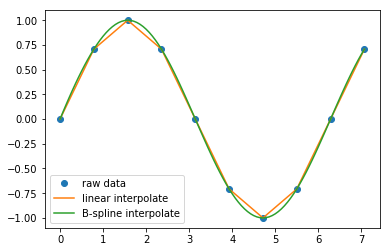

In [55]:
# 下面是使用直线和B-Spline对正弦波上的点进行插值的例子
import numpy as np
import pylab as pl
from scipy import interpolate

x = np.linspace(0, 2*np.pi+np.pi/4, 10)
y = np.sin(x)

x_new = np.linspace(0, 2*np.pi+np.pi/4, 100)
f_linear = interpolate.interp1d(x,y)
tck = interpolate.splrep(x,y)
y_bspline = interpolate.splev(x_new, tck)

pl.plot(x, y, "o", label=u"raw data")
pl.plot(x_new, f_linear(x_new), label=u"linear interpolate")
pl.plot(x_new, y_bspline, label=u"B-spline interpolate")
pl.legend()
pl.show()
# B-Spline插值需要先使用splrep函数计算出B-Spline曲线的参数
# 然后将参数传递给splev函数计算出各个取样点的插值结果

In [ ]:
"""B-Spline插值运算需要先使用splrep函数计算出B-Spline曲线的参数，然
后将参数传递给splev函数计算出各个取样点的插值结果"""

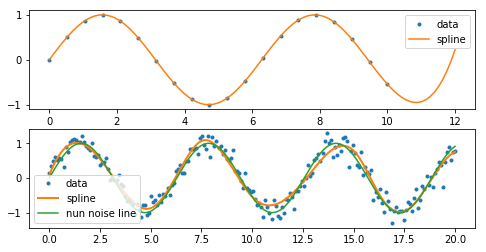

In [56]:
"外推和 Spline 拟合"
""" 前面介绍的interp1d类要求其参数x是一个递增序列,并且只能在x
的取值范围之内进行内插计算，不能用它进行外推运算，即无法计
算x的取值范围之外的数据点。UnivariateSpline类的插值运算比
interp1d更高级，它支持外推运算，其调用形式如下"""
"UnivariateSpline(x, y, w=None, bboxs=[None, None], k=3, s=None)"
"""x、y是保存数据点的X-Y坐标的数组，其中x必须是递增序列。
   w是为每个数据点指定的权重值。
   bboxs序列指定的近似区间的边界.
   k为样条曲线的阶数。
   s是平滑参数，它使得最终生成的样条曲线满足条件∑(w∙(y-spline(x)))2≤s ,
   即当 s>0时，样条曲线并不一定通过各个数据点.为了让
曲线通过所有数据点，必须将s参数设置为0"""
#  使用UnivariateSpline进行插值运算
# 即当s>0时，样条曲线并不一定通过各个数据点
# 为了让曲线通过所有数据点，必须将参数设置为0
# 举例
%matplotlib inline
import numpy as np
import pylab as pl
from scipy import interpolate

x1 = np.linspace(0, 10, 20)
y1 = np.sin(x1)
sx1 = np.linspace(0, 12, 100)
sy1 = interpolate.UnivariateSpline(x1, y1, s=0)(sx1)

x2 = np.linspace(0, 20, 200)
# 加随机扰动
y2 = np.sin(x2) + np.random.standard_normal(len(x2)) * 0.2
sx2 = np.linspace(0, 20, 2000)
sy2 = interpolate.UnivariateSpline(x2, y2, s=8)(sx2)

pl.figure(figsize=(8,4))
pl.subplot(211)
pl.plot(x1, y1, ".", label=u"data")
pl.plot(sx1, sy1, label=u"spline")
pl.legend()

pl.subplot(212)
pl.plot(x2, y2, ".", label=u"data")
pl.plot(sx2, sy2, linewidth=2, label=u"spline")
pl.plot(x2, np.sin(x2), label=u"nun noise line")
pl.legend()
pl.show()
# 在x轴大于10的样条曲线仍然呈现出正弦波类似的形状
# 对于带噪声的输入数据选择合适的s参数能够使得样条曲线接近无噪声时的波形
# 可以把它看做使用样条曲线对数据进行拟合运算

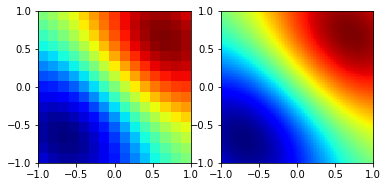

In [57]:
"二维插值"
" 使用interp2d()可以进行二维插值运算，它的调用形式如下"
"interp2d(x, y, z, kind='linear’ ,...) "
"""其中：x、y、z都是一维数组，如果传入的是多维数组，就先将它转换
为一维数组；kind 参数指定插值运算的阶数，可以为’linear’、’cubic‘
或’quintic’"""
# 二维插值
# 使用interp2d()函数可以进行二维插值运算
# interp2d(x, y, z, kind="linear)
# 其中x，y，z都是一维数组，如果传入的是多维数组，就先将它
# 转换为一维数组；kind参数指定插值运算的阶数，可以为
# 'linear','cubic'或'quintic'
# 实例
%matplotlib inline
import numpy as np
from scipy import interpolate
import pylab as pl

def func(x, y):
    return (x+y)*np.exp(-0.5*(x**2 + y**2))

# X-Y轴分别为15*15的网格
y,x = np.mgrid[-1:1:15j, -1:1:15j]
fvals = func(x,y) # 计算每个网格上的函数值

# 二维插值
newfunc = interpolate.interp2d(x, y, fvals, kind='cubic')

# 计算100*100的网格上的插值
xnew = np.linspace(-1, 1, 100)
ynew = np.linspace(-1, 1, 100)
fnew = newfunc(xnew, ynew)

# 绘图
# 为了更明显的比较插值前后的区别，使用关键字参数interpolation='nearest'
# 关闭imshow()内置的插值运算
pl.subplot(121)
pl.imshow(fvals, extent=[-1,1,-1,1], cmap=pl.cm.jet,
          interpolation='nearest', origin='lower')
pl.subplot(122)
pl.imshow(fnew, extent=[-1,1,-1,1], cmap=pl.cm.jet,
          interpolation='nearest', origin='lower')
pl.show()
# interp2d只能对网格形状的取样值进行插值运算

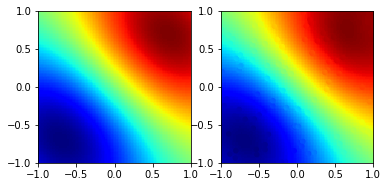

In [58]:
"""func是计算曲面上各点高度的函数。所得到的二维数组fvals的第0轴
与Y轴对应，第一轴与X 轴对应 。interp2d 对象可以像函数一样调用，
用它计算插值曲面在一个更密的网格中的高 度值。这里的参数是两个
一维数组，分别指定网格的X-Y轴坐标，而不需要通过mgrid创建网格
坐标数组"""
""" interp2d只能对网格形状的取样值进行插值运算，如果需要对随机散
列的取样点进行插值， 就需要使用径向基函数(Radial Basis Function,简
称RBF)插值算法。RBF支持多维散列点的插值运算"""
# 使用RBF对随机取样点进行二维插值
# 如果需要对随机散列的取样点进行插值，就需要使用径向基函数
# Radial Basis Function简称RBF插值算法；
# RBF支持多维散列点的插值运算
# 举例
%matplotlib inline
import numpy as np
from scipy import interpolate
import pylab as pl

def func(x, y):
    return (x+y)*np.exp(-0.5*(x**2 + y**2))

# 计算曲面函数上100个随机分布的点
x = np.random.uniform(-1.0, 1.0, size=100)
y = np.random.uniform(-1.0, 1.0, size=100)
fvals = func(x, y)

# 使用RBF进行插值运算
newfunc = interpolate.Rbf(x, y, fvals, function='multiquadric')
ynew, xnew = np.mgrid[-1:1:100j, -1:1:100j] # 插值结果的网格
fnew = newfunc(xnew, ynew)
truevals = func(xnew, ynew) # 函数的真实值

pl.subplot(121)
pl.imshow(truevals, extent=[-1,1,-1,1], cmap=pl.cm.jet,
             origin="lower")
pl.subplot(122)
pl.scatter(x, y, 20, fvals, cmap=pl.cm.jet)
pl.imshow(fnew, extent=[-1,1,-1,1], cmap=pl.cm.jet,
             origin="lower")
pl.show()
# RBD和interp2d对象不同的是它不会自动产生网格上的个点；
# 因此为了使用等距的正交网格，使用mgrid对象创建两个数组
# 使用随机点创建一个RBF对象，并通过function参数指定所使用的径向
#基函数。RBF对象也可以像函数那样被调用，用它计算更密的网格上各
#点的值。它的两个参数是指定X-Y轴坐标的两个数组。和interp2d对象不
#同的是，它不会自动产生网格上的各点，因此为了使用等距的正交网格
#，使用mgird对象创建这两个数组

In [9]:
"数值积分"
"""SciPy的integrate模块提供了几种数值积分算法，其中包括对常微分方
程组(ODE)的数值积分。本节以计算球体体积和洛伦茨吸引子轨迹为例
介绍integrate模块的用法"""

"圆的面积"
# 数值积分是对定积分的数值求解,例如可以利用数值积分计算某个形状的面积
# 先考虑如何计算半径为1的半圆的面积，根据圆的面积公式，其面积等于pi/2
# 单位半圆的曲线方程为y=(1-x^2)^(1/2)
# 可以通过下面的half_circle()进行计算，用数值积分求圆的面积和球的体积

def half_circle(x):
    return (1-x**2)**0.5
# 最简单的数值积分算法就是将要积分的面积分为许多小矩形，然后计算这些矩形
# 的面积之和，下面使用这种方法，将x轴上-1到1区间分为10000等分
# 然后计算面积和
N = 10000
x = np.linspace(-1, 1, N)
dx = x[1] - x[0]
y = half_circle(x)

s2 = 2 * dx * np.sum(y) # 面积的两倍
print("Unit circular area：", s2)

# 也可以用numpy的trapz()计算半圆上各点构成的多边形的面积
""" trapz()计算的是以(x,y)为顶点坐标的折线与X轴所夹的面积。如果使用
SciPy的integrate模块中的数值积分函数quad(),将能得到非常精确的结果"""
s2 = np.trapz(y, x) * 2 # 面积的两倍
print("Unit circular area: ", s2)

from scipy import integrate
s_half, err = integrate.quad(half_circle, -1, 1)
s2 = s_half * 2
print(s2, err)


Unit circular area： 3.1415893269307373
Unit circular area:  3.1415893269315975
3.141592653589797 1.0002356720661965e-09


In [60]:
"多重积分"
"""计算多重定积分可以通过多次调用quad()来实现，为了调用方便，
integrate模块提供了double quad即dblquad()以进行二重定积分，
以及triple quad即tplquad()用于进行三重定积分.
下面以计算单位半球体积为例，说明dblquad()的用法"""

"球的体积"
"# 单位半球面上的点(x,y,z)满足x**2+y**2+z**2=1"
"# 因此下面half_sphere()可以通过X-Y轴坐标计算球面上点z轴的坐标"
def half_sphere(x, y):
    return (1-x**2-y**2)**0.5
"""X-Y轴平面与此球体的交线为一个单位圆，因此二重积分的计算区间
为此单位圆。即对于 X轴从-1到1进行积分，而对于Y轴则从-
half_circle(x)到half_circle(x)进行积分。
因此半球体积的二重积分公式为
"""
from IPython.display import Latex
Latex(r"""\[ \int_{-1}^1 \! \int_{-\sqrt{1-x^2}}^\sqrt{1-x^2}
        \sqrt{1-x^2-y^2}\,dy\,dx\]""")

<IPython.core.display.Latex object>

In [10]:
"# 下面程序使用dblquad()计算半球球体积"
"""# dblquad()的调用参数
# dblquad(func2d, a, b, gfun, hfun)
# func2d是需要进行二重积分的函数，它有两个参数假设x,y
# a和b参数指定被积函数的第一个变量即x的积分区间
# gfun和hfun参数指定第二个参数即y的积分区间,都是函数"""

# 通过变量x计算y的积分区间
def half_circle(x):
    return (1-x**2)**0.5
def half_sphere(x, y):
    return (1-x**2-y**2)**0.5

from scipy import integrate
# dblquad参数分别为被积函数，第一个变量积分区间，第二个变量积分区间
v2, err = integrate.dblquad(half_sphere, -1, 1,
                            lambda x:-half_circle(x),
                             lambda x:half_circle(x))
print("Sphere volume: %d, error: %d" % (v2, err))
print(np.pi*4/3/2) #通过球体体积公式计算的半球体积进行验证

Sphere volume: 2, error: 0
2.0943951023931953


In [62]:
"解常微分方程组"
# 解常微分方程组
# integrate还提供了对常微分方程组进行积分的函数odeint()
# 下面用它计算洛伦兹吸引子的轨迹
# 洛伦兹吸引子由下面3个微分方程定义
Latex(r"""\[\frac{dx}{dt} = \sigma\cdot(y-x),
    \frac{dy}{dt}=x\cdot(\rho-z)-y,
    \frac{dz}{dt}=xy-\beta z
\]""")
# 这三个方程定义了三维空间中的各个坐标点上的速度矢量
# 从某个坐标开始沿着速度矢量进行积分，既可以计算出无质量点在此空间
# 中的运动轨迹。其中alpha，rho，betaWie常数，不同的参数可以计算出
# 不同的运动轨迹：x(t),y(t),z(t)

<IPython.core.display.Latex object>

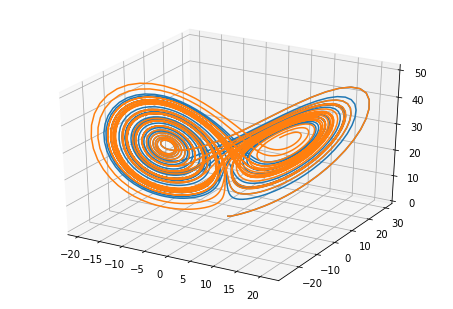

In [63]:
# 当参数为某些值时，轨迹出现混沌现象
# 即微小的初值差别也会显著影响运动轨迹，下面是洛伦兹吸引子的轨迹计算
# 和绘制程序
from scipy.integrate import odeint
import numpy as np

"""程序中首先定义一个函数lorenz(),它的任务是计算出某个坐标点在
各个方向上的微分值，可以直接根据洛伦茨吸引子的公式得出。"""
def lorenz(w, t, p, r, b):
    # 给出位置矢量w和三个参数p，r，b
    # dx/dt, dy/dt. dz/dt
    x,y,z = w.tolist()
    # 直接与lorenz的计算公式对应
    return p*(y-x), x*(r-z), x*y-b*z

t = np.arange(0, 30, 0.01) # 创建时间点
# 调用ode对lorenz进行求解，用两个不同的初值
"使用不同的位移初始值两次调用odeint(),对微分方程求解"
track1 = odeint(lorenz, (0.0, 1.00, 0.00), t, args=(10.0, 28.0, 3.0))
track2 = odeint(lorenz, (0.0, 1.01, 0.00), t, args=(10.0, 28.0, 3.0))
"""odeint()有许多参数分别为：
lorenz:它是计算某个位置上各个方向的速度的函数。
(0.0,1.0,0.0):位置初始值，它是计算常微分方程所需的各个变量的初始值。
t:表示时间的数组，odeint()对此数组中的每个时间点进行求解，得出所有时间
点的位置。
args:这些参数直接传递给lorenz(),因此它们在整个积分过程中都是常量"""

"通过 matplotlib 的三维绘图模块绘制出odeint()后得到的轨迹。"
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

"即使初始值只相差0.01，两条运动轨迹也是完全不同的"
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(track1[:,0], track1[:,1], track1[:,2])
ax.plot(track2[:,0], track2[:,1], track2[:,2])
plt.show()


In [64]:
"统计"
"""Scipy的stats模块包含了多种概率分布的随机变量，随机变量分为连续
的和离散的两种。 所有的连续随机变量都是rv_continuous的派生类的对
象，而所有的离散随机变量都是 rv_discrete的派生类的对象"""
"连续和离散概率分布"
"可以使用下面的语句获得stats模块中所有的连续随机变量"
from scipy import stats
[k for k,v in stats.__dict__.items() if isinstance(v,stats.rv_continuous)]

['ksone',
 'kstwobign',
 'norm',
 'alpha',
 'anglit',
 'arcsine',
 'beta',
 'betaprime',
 'bradford',
 'burr',
 'burr12',
 'fisk',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'dgamma',
 'dweibull',
 'expon',
 'exponnorm',
 'exponweib',
 'exponpow',
 'fatiguelife',
 'foldcauchy',
 'f',
 'foldnorm',
 'weibull_min',
 'weibull_max',
 'frechet_r',
 'frechet_l',
 'genlogistic',
 'genpareto',
 'genexpon',
 'genextreme',
 'gamma',
 'erlang',
 'gengamma',
 'genhalflogistic',
 'gompertz',
 'gumbel_r',
 'gumbel_l',
 'halfcauchy',
 'halflogistic',
 'halfnorm',
 'hypsecant',
 'gausshyper',
 'invgamma',
 'invgauss',
 'invweibull',
 'johnsonsb',
 'johnsonsu',
 'laplace',
 'levy',
 'levy_l',
 'levy_stable',
 'logistic',
 'loggamma',
 'loglaplace',
 'lognorm',
 'gilbrat',
 'maxwell',
 'mielke',
 'kappa4',
 'kappa3',
 'nakagami',
 'ncx2',
 'ncf',
 't',
 'nct',
 'pareto',
 'lomax',
 'pearson3',
 'powerlaw',
 'powerlognorm',
 'powernorm',
 'rdist',
 'rayleigh',
 'reciprocal',
 'rice',
 'recipinvgauss',
 'semi

In [65]:
"""连续随机变量对象都有如下方法：
 rvs:对随机变量进行随机取值，可以通过size参数指定输出的数组大小。 
 pdf:随机变量的概率密度函数。
 cdf:随机变量的累积分布函数，它是概率密度函数的积分。
 sf:随机变量的生存函数，它的值是1-cdf(t)。
 ppf:累积分布函数的反函数。
 stats:计算随机变量的期望值和方差。
 fit：对一组随机取样进行拟合，找出最适合取样数据的概率密度函数的系数。
"""
"""下面以正态分布为例，简单介绍随机变童的用法。获得默认正态分
布的随机变量的期望值和方差，默认情况下它是一个均值为0、方差为
1的随机变量"""
stats.norm.stats()

(array(0.), array(1.))

In [66]:
""" norm可以像函数那样来调用，通过loc和scale参数可以指定随机变量
的偏移和缩放参数。 对于正态分布的随机变量来说，这两个参数相当
于指定其期望值和标准差"""
X =stats.norm(loc=1.0,scale=2.0)
X.stats()

(array(1.), array(4.))

In [68]:
"""下面调用随机变量X的rvs()方法，得到包含一万次随机取样值的数组x:
然后调用NumPy 的mean()和var(),计算此数组的均值和方差，其结果符合
随机变量x的特性"""
x =X.rvs(size=10000) # 对随机变量取 10000个值
np.mean(x) # 期望值

1.000970303205305

In [69]:
np.var(x) # 方差

3.9787343079722115

In [70]:
"""也可以使用fit()方法对随机取样序列x进行拟合，返回的是与随机取样
值最吻合的随机变量的参数"""
stats.norm.fit(x) #得到随机序列的期望值和标准差

(1.000970303205305, 1.9946764920588531)

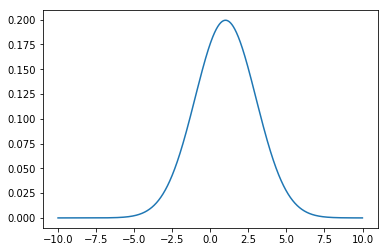

In [71]:
"接下来比较随机变量X的概率密度函数和对数组x进行直方图统计的结果"
from scipy import stats
import numpy as np
import matplotlib.pyplot as pl
X =stats.norm(loc=1.0,scale=2.0)
t = np.arange(-10, 10, 0.01)
pl.plot(t, X.pdf(t)) 
#绘制概率密度函数的理论
pl.show()

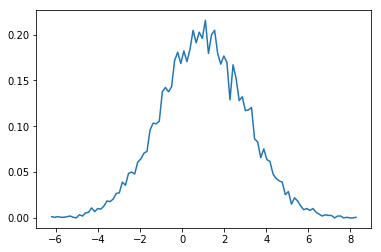

In [72]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as pl
X =stats.norm(loc=1.0,scale=2.0)
x =X.rvs(size=10000) # 对随机变量取 10000个值
p, t2 =np.histogram(x, bins=100, normed=True)
t2 = (t2[:-1] + t2[1:])/2
pl.plot(t2, p) #绘制统计所得到的概率密度
pl.show()

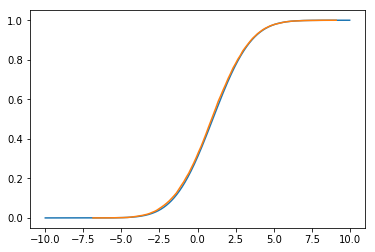

In [73]:
"""其中，histogram()对数组x进行直方图统计。histogram()返回两个数
组p和t2,其中p表示各个区间取样值出现的频数，由于normed参数
为True,因此p的值是正规化之后的结果。t2表示区间，由于其中
包括区间起点和终点，因此t2的长度为101"""
"下面的程序绘制随机变量X的累积分布函数和数组p的累加结果"
from scipy import stats
import numpy as np
import matplotlib.pyplot as pl
X =stats.norm(loc=1.0,scale=2.0)
x =X.rvs(size=10000) # 对随机变量取 10000个值
t = np.arange(-10, 10, 0.01)
p, t2 =np.histogram(x, bins=100, normed=True)
t2 = (t2[:-1] + t2[1:])/2
pl.plot(t, X.cdf(t))
pl.plot(t2, np.add.accumulate(p)*(t2[1]-t2[0]))
pl.show()

In [74]:
"""有些随机分布除了loc和scale参数之外，还需要额外的形状参数。例如伽
玛分布可用于描述等待k个独立的随机事件发生所需的时间，k就是伽玛分
布的形状参数。下面计算形状参数 k为1和2时伽玛分布的期望值和方差"""
stats.gamma.stats(1.0)

(array(1.), array(1.))

In [75]:
stats.gamma.stats(2.0) 

(array(2.), array(2.))

In [76]:
"伽玛分布的尺度参数   和随机事件发生的频率相关，由scale参数指定"
stats.gamma.stats(2.0,scale=2) 

(array(4.), array(8.))

In [77]:
"""根据伽玛分布的数学定义可知其期望值为k θ,方差为kθ^2。
上面的程序验证了这两个公式。当随机分布有额外的形状
参数时，它所对应的rvs()、pdf()等方法都会增加额外的参数以接收形状
参数。例如下面的程序调用rvs()对k=2,θ=2的伽玛分布取4个随机值"""
x =stats.gamma.rvs(2, scale=2,size=4)
x

array([ 4.81665955,  3.35688488,  8.09715243, 10.88583154])

In [78]:
"接下来调用pdf(),査看上面4个随机值所对应的概率密度"
stats.gamma.pdf(x, 2, scale=2)

array([0.10833321, 0.1566528 , 0.03531816, 0.01177534])

In [79]:
"""也可以先创建将形状参数和尺度参数固定的随机变量，然后再调用其
pdf()计算概率密度"""
X = stats.gamma(2, scale=2)
X.pdf(x)

array([0.10833321, 0.1566528 , 0.03531816, 0.01177534])

In [81]:
"""当分布函数的值域为离散时，称之为离散概率分布。例如投掷有6个
面的骰子时，只能获得1到6的整数，因此得到的概率分布为离散的。对
于离散随机分布，通常使用概率质量函数(PMF)描述其分布情况"""
"""在stats库中所有描述离散分布的随机变量都从rv_discrete类继承。也
可以直接用rv_discrete 类自定义离散概率分布。例如假设有一个不均匀
的骰子，各点出现的概率不相等。可以用下面的数组x保存骰子的所有
可能值，数组p保存每个值出现的概率"""
x = range(1,7)
p = (0.4, 0.2, 0.1, 0.1, 0.1, 0.1)

In [82]:
"""于是，可以用下面的语句定义表示这个特殊骰子的随机变量，并调用
其rvs()方法投掷此骰子20次，获得符合概率p的随机数"""
dice = stats.rv_discrete(values=(x,p))
dice.rvs(size=20)

array([6, 5, 5, 3, 5, 1, 2, 2, 1, 1, 6, 4, 6, 1, 5, 2, 1, 1, 2, 1])

In [ ]:
"二项、泊松、伽玛分布"
